In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import ast

In [17]:
# Kiểm tra xem CUDA có khả dụng không
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
# Cấu hình các thông số huấn luyện
# num_classes = 36  # Số lượng lớp đầu ra
num_sensors =5
sequence_length=350

In [19]:
# # Khởi tạo dữ liệu giả định và di chuyển nó lên GPU (nếu có sẵn)
# num_samples = 1000
# sequence_length = 100
# X_train = torch.randn(num_samples, num_sensors, sequence_length).to(device)
# y_train = torch.randint(0, num_classes, (num_samples,)).to(device)
# print("Kích thước của x_train:", X_train.shape)
# print("Kích thước của y_train:", y_train.shape)

# #luu du lieu tao duoi dang csv
# import pandas as pd

# # Chuyển đổi tensors PyTorch thành mảng NumPy
# X_train_numpy = X_train.cpu().numpy()
# y_train_numpy = y_train.cpu().numpy()

# # Tạo DataFrame từ dữ liệu
# data = {'x' + str(i+1): X_train_numpy[:, i, :].tolist() for i in range(num_sensors)}
# data['y'] = y_train_numpy.tolist()
# df = pd.DataFrame(data)

# # Lưu DataFrame vào file CSV
# df.to_csv('data.csv', index=False)

# print("File CSV đã được lưu.")
# X_train[0]


In [20]:
# #Load du lieu x y tu file csv
# import pandas as pd
# import ast
# import torch

# # Đọc dữ liệu từ file CSV vào DataFrame
# df = pd.read_csv('data.csv')

# # Tách cột 'x' và 'y'
# x_data = df[['x1', 'x2', 'x3', 'x4', 'x5']]  # Chọn các cột 'x1', 'x2', 'x3', 'x4', 'x5' làm đặc trưng
# y_data = df['y']  # Chọn cột 'y' làm nhãn

# # Chuyển đổi dữ liệu 'x' thành tensors PyTorch
# x_train = []
# for _, row in x_data.iterrows():
#     x_values = [ast.literal_eval(val) for val in row.values]  # Phân tích các giá trị từ chuỗi thành danh sách
#     x_train.append(torch.tensor(x_values, dtype=torch.float32))
# X_train = torch.stack(x_train).to(device)
# # Chuyển đổi dữ liệu 'y' thành tensors PyTorch
# y_train = torch.tensor(y_data.values, dtype=torch.long).to(device)

# # Kiểm tra kích thước của tensors
# print("Kích thước của x_train:", X_train.shape)
# print("Kích thước của y_train:", y_train.shape)

# num_samples = y_train.shape[0]

# # X_train[0]


# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('data.csv')

# Tách cột 'x' và 'y'
x_data = df[['x1', 'x2', 'x3', 'x4', 'x5']]  # Chọn các cột 'x1', 'x2', 'x3', 'x4', 'x5' làm đặc trưng
y_data = df['y']  # Chọn cột 'y' làm nhãn

# Chuyển đổi dữ liệu 'x' thành tensors PyTorch
x_train = []
for _, row in x_data.iterrows():
    x_values = [ast.literal_eval(val) for val in row.values]  # Phân tích các giá trị từ chuỗi thành danh sách
    x_train.append(torch.tensor(x_values, dtype=torch.float32))
X_train = torch.stack(x_train).to(device)
# Tạo label map từ các nhãn khác nhau trong cột 'y'
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_data)

# Tạo bản đồ nhãn ngược lại cho việc giải mã sau này
label_map = {label: index for index, label in enumerate(label_encoder.classes_)}
# Đếm số lượng nhãn sau khi mã hóa
num_classes = len(label_encoder.classes_)

# In label map để kiểm tra
print("Label map:", label_map)

# Chuyển đổi dữ liệu 'y' thành tensors PyTorch
y_train = torch.tensor(y_train_encoded, dtype=torch.long)

# In các nhãn của y_train để kiểm tra
print("Các nhãn của y_train:", y_train)
num_samples = y_train.shape[0]


Label map: {'[11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11]': 0, '[11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,51,51,51,51,

In [21]:
print(X_train.shape,'-',y_train.shape)


torch.Size([1006, 5, 350]) - torch.Size([1006])


In [22]:
# Định nghĩa mô hình CNN 1D
class CNN1D(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_size, out_channels=128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.conv5 = nn.Conv1d(in_channels=512, out_channels=1024, kernel_size=3, padding=1)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.batch_norm3 = nn.BatchNorm1d(512)
        self.batch_norm4 = nn.BatchNorm1d(512)
        self.batch_norm5 = nn.BatchNorm1d(1024)
        self.dropout = nn.Dropout(0.3)
        self.padding = nn.ConstantPad1d((0, 1), value=0)
        self.maxpool = nn.MaxPool1d(kernel_size=2, stride=1 )
        self.fc = nn.Linear(1024*sequence_length, num_classes)  # Chỉnh kích thước đầu vào của fully connected

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.conv1(x)))
        # print(f'Kich thuoc x sau conv1 {x.shape}')
        x = torch.relu(self.batch_norm2(self.conv2(x)))
        # print(f'Kich thuoc x sau conv2 {x.shape}')
        x = torch.relu(self.batch_norm3(self.conv3(x)))
        # print(f'Kich thuoc x sau conv3 {x.shape}')
        x = torch.relu(self.batch_norm4(self.conv4(x)))
        # print(f'Kich thuoc x sau conv4 {x.shape}')
        x = torch.relu(self.batch_norm5(self.conv5(x)))
        # print(f'Kich thuoc x sau conv5 {x.shape}')
        # x = torch.max_pool1d(x, kernel_size=2,)
        x = self.padding(x)
        # print(f'Kich thuoc x sau padding {x.shape}')
        x = self.maxpool(x)
        # print(f'Kich thuoc x sau maxpol {x.shape}')
        x = self.dropout(x)
        # print(f'Kich thuoc x sau dropout {x.shape}')
        x = x.view(x.size(0), -1)  # Kích thước phẳng (flattening)
        # print(f'Kich thuoc x sau x.view {x.shape}')
        x = self.fc(x)
        return x
# Khởi tạo mô hình
input_size = num_sensors  # Số lượng cảm biến
model = CNN1D(input_size=input_size, num_classes=num_classes).to(device)

In [23]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate):
        super(LSTMModel, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    # def forward(self, x):
    #     # Khởi tạo hidden state và cell state ban đầu
    #     h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
    #     c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

    #     # Đi qua LSTM
    #     out, _ = self.lstm(x, (h0, c0))

    #     # Chỉ lấy thông tin từ timestep cuối cùng
    #     out = out[:, -1, :]

    #     # Đi qua tầng fully connected
    #     out = self.fc(out)

    #     # Áp dụng hàm kích hoạt ReLU
    #     out = self.relu(out)
    #     return out

# # Khởi tạo mô hình
# input_size = 100  # Mỗi chuỗi kênh đầu vào có kích thước 1x100
# hidden_size = 1024  # Số hidden unit
# num_layers = 2  # Số lớp LSTM
# num_classes = 36  # Số lớp đầu ra
# dropout_rate = 0.3  # Tỉ lệ dropout

# model = LSTMModel(input_size, hidden_size, num_layers, num_classes, dropout_rate)

# # Kiểm tra mô hình với batch size là 32, 1024 chuỗi, mỗi chuỗi 100 timesteps
# test_input = torch.randn(32, 1024, 100)  # Batch size là 32
# output = model(test_input)
# print(output.shape)  # Kết quả đầu ra sẽ có kích thước [32, 36]

In [24]:
# class CNNLSTM(nn.Module):
#     def __init__(self, input_size, num_classes):
#         super(CNNLSTM, self).__init__()
#         # Khai báo phần CNN
#         self.cnn = CNN1D(input_size=input_size, num_classes=num_classes)
#         # Khai báo phần LSTM
#         self.lstm = LSTMModel(input_size=1024, hidden_size=1024, num_layers=2, num_classes=num_classes, dropout_rate=0.3)

#     def forward(self, x):
#         batch_size, _, _ = x.shape
#         # Qua CNN
#         x = self.cnn.conv1(x)
#         x = torch.relu(self.cnn.batch_norm1(x))
#         x = self.cnn.conv2(x)
#         x = torch.relu(self.cnn.batch_norm2(x))
#         x = self.cnn.conv3(x)
#         x = torch.relu(self.cnn.batch_norm3(x))
#         x = self.cnn.conv4(x)
#         x = torch.relu(self.cnn.batch_norm4(x))
#         x = self.cnn.conv5(x)
#         x = torch.relu(self.cnn.batch_norm5(x))
#         x = self.cnn.padding(x)
#         x = self.cnn.maxpool(x)
#         x = self.cnn.dropout(x)
#         print(f"kich thuoc x sau dropout: {x.shape}")
#         # print(x)
#         # Thay đổi hình dạng để phù hợp với đầu vào của LSTM
#         x = x.transpose(1, 2)  # Transpose để phù hợp chiều với LSTM
#         x = x.contiguous().view(batch_size, -1, 1024)  # Sắp xếp lại để có kích thước phù hợp cho LSTM
#         print(f"kich thuoc x sau contiguous: {x.shape}")
#         # print(x)

#         # Qua LSTM
#         # x = self.lstm(x)

#         # Khởi tạo hidden state và cell state ban đầu
#         h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
#         c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)

#         # Đi qua LSTM
#         x, _ = self.lstm.lstm(x, (h0, c0))
#         print(f"kich thuoc x sau lstm: {x.shape}")
#         # print(x)
#         # Chỉ lấy thông tin từ timestep cuối cùng
#         x = x[:, -1, :]

#         print(f"kich thuoc x sau timestep cuoi: {x.shape}")
#         # print(x)

#         # Đi qua tầng fully connected
#         x = self.lstm.fc(x)
#         # Áp dụng hàm kích hoạt ReLU
#         x = self.lstm.relu(x)
#         # print(f"kich thuoc x sau fc: {x.shape}")
#         # print(x)

#         return x
# # Khởi tạo mô hình
# input_size = num_sensors  # Số lượng cảm biến
# model = CNNLSTM(input_size=input_size, num_classes=num_classes).to(device)

tensor(45)


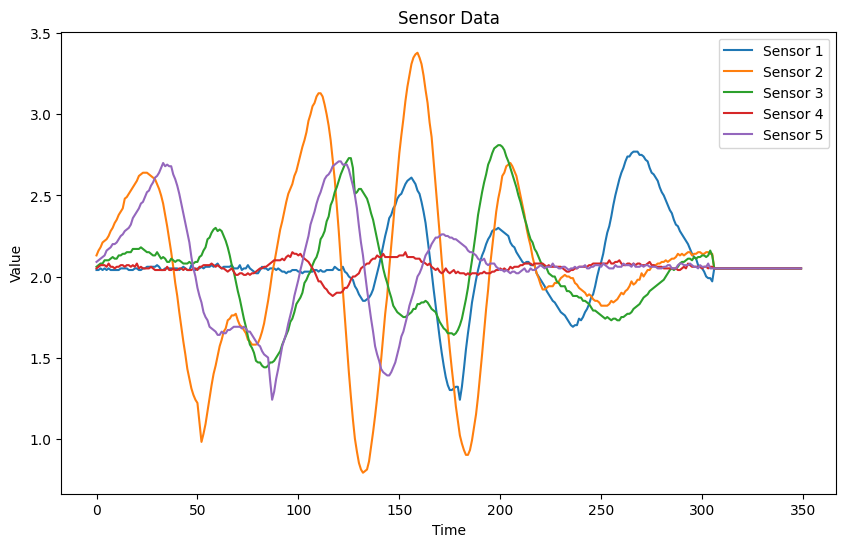

In [25]:
# Chọn một mẫu ngẫu nhiên từ tập dữ liệu đào tạo
sample_index = np.random.randint(0,num_samples)

# Lấy dữ liệu và nhãn của mẫu đã chọn
sample_data = X_train[sample_index].cpu().numpy()  # Chuyển dữ liệu về CPU và numpy array
# sample_label = y_train[sample_index].item()
sample_label = y_train[sample_index]

# Vẽ dữ liệu từng cảm biến
plt.figure(figsize=(10, 6))
# Plot data for each sensor
for i in range(num_sensors):
        plt.plot(sample_data[i], label=f"Sensor {i+1}")

# # Check if the first dimension has more than one element
# if sample_data.shape[0] > 1:
#     # Plot data for each sensor
#     for i in range(num_sensors):
#         plt.plot(sample_data[i], label=f"Sensor {i+1}")
# else:
#     # If only one element, plot directly
#     plt.plot(sample_data[0], label="Sensor 1")

print(sample_label)
plt.title('Sensor Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [26]:
# Huấn luyện mô hình
num_epochs = 100
batch_size = 32
learning_rate = 0.0001
weight_decay = 0.0001  # L2 regularization

# Khởi tạo optimizer và loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [27]:
import torch.utils.data as data

# Tổng số mẫu
total_samples = len(X_train)

# Tính số lượng mẫu cho tập huấn luyện và tập kiểm tra
train_size = int(0.8 * total_samples)  # 80% cho tập huấn luyện
test_size = total_samples - train_size  # 20% cho tập kiểm tra

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset, test_dataset = data.random_split(torch.utils.data.TensorDataset(X_train, y_train), [train_size, test_size])

# Khởi tạo DataLoader cho cả tập huấn luyện và tập kiểm tra
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [28]:
# Đường dẫn đến tệp tin chứa trạng thái của mô hình
model_file_path = 'my_model(cnn).pth'

# Kiểm tra xem tệp tin tồn tại hay không
if os.path.isfile(model_file_path):
    # Nếu tệp tin tồn tại, tải trạng thái của mô hình từ tệp tin đã lưu
    model.load_state_dict(torch.load(model_file_path))
    print("Đã tải mô hình từ tệp tin đã lưu.")
else:
    print("Không tìm thấy tệp tin của mô hình.")

Không tìm thấy tệp tin của mô hình.


In [29]:
# # Tạo label map từ các nhãn khác nhau trong y_train
# label_map = {}
# index = 0
# for label in y_train.unique():
#     label_map[label.item()] = index
#     index += 1

# # Tạo label map từ chuỗi nhãn sang chỉ mục nguyên
# label_map = {}
# index = 0
# for i in range(1, 10):
#     for j in range(1, 5):
#         # Biểu diễn vị trí của mỗi ô trong lưới 9x4 dưới dạng chuỗi
#         label = f"{i}{j}"
#         # Ánh xạ chuỗi nhãn sang chỉ mục nguyên
#         label_map[label] = index
#         index += 1

# # In label map để kiểm tra
# print(label_map)



In [30]:
# Hàm chuyển đổi chuỗi nhãn thành chỉ mục nguyên
def label_to_index(labels):
    # Chuyển đổi tensor labels về list giá trị của nó
    labels_list = [str(label.item()) for label in labels]
    # Sử dụng list giá trị để truy cập từ điển ánh xạ
    return torch.tensor([label_map[label] for label in labels_list])

# Tạo từ điển ánh xạ từ chỉ mục lớp sang nhãn
index_to_label = {index: label for label, index in label_map.items()}

# Hàm chuyển đổi chỉ mục thành nhãn
def index_to_label_func(index):
    return index_to_label[index]


In [31]:
train_losses=[]
# Huấn luyện mô hình
for epoch in range(num_epochs):
    model.train()  # Chuyển sang chế độ huấn luyện
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # # Chuyển đổi nhãn thành chỉ mục nguyên
        # labels = label_to_index(labels_str).to(device)

        # Feedforward
        outputs = model(inputs)

        # Tính loss và backward
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Lưu trữ loss cho epoch hiện tại
    train_losses.append(running_loss / (num_samples / batch_size))

    if (epoch+1)%1==0:
      # Lưu trạng thái của mô hình vào một tệp tin
      torch.save(model.state_dict(), model_file_path)
      print(f'Da luu model: {model_file_path}')
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Training finished!')


Da luu model: my_model(cnn).pth
Epoch [1/100], Loss: 1.1891
Da luu model: my_model(cnn).pth
Epoch [2/100], Loss: 0.0002
Da luu model: my_model(cnn).pth
Epoch [3/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [4/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [5/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [6/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [7/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [8/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [9/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [10/100], Loss: 0.0001
Da luu model: my_model(cnn).pth
Epoch [11/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [12/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [13/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [14/100], Loss: 0.0001
Da luu model: my_model(cnn).pth
Epoch [15/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
Epoch [16/100], Loss: 0.0000
Da luu model: my_model(cnn).pth
E

In [32]:
print(f"Input shape: {inputs.shape}")
print(f"Output shape: {outputs.shape}")

Input shape: torch.Size([4, 5, 350])
Output shape: torch.Size([4, 64])


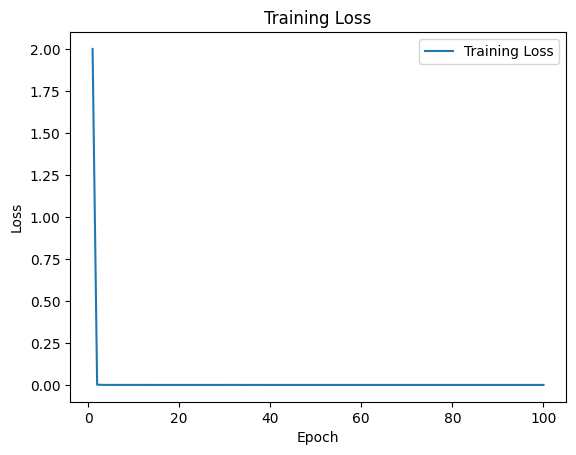

In [33]:
# Vẽ đồ thị loss qua các epoch
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# # Giả sử model đã được huấn luyện và có tên là model

# # Chuỗi đầu vào
# input_sequence = torch.randn(1, 5, 10)  # Giả sử kích thước của chuỗi là (1, 5, 100)

# # Vẽ dữ liệu từng cảm biến
# plt.figure(figsize=(10, 6))
# for i in range(num_sensors):
#     plt.plot(input_sequence[0][i], label=f"Sensor {i+1}")
# plt.title('Sensor Data')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [35]:
# # Dự đoán đầu ra
# with torch.no_grad():
#     output = model(input_sequence.to(device))

# # Xử lý đầu ra để có được dự đoán cuối cùng
# predicted_class = torch.argmax(output, dim=1)
# predicted_label = index_to_label_func(predicted_class.item())

# print("Dự đoán cuối cùng:", predicted_label)

In [39]:
TP=0
number_sample=0
# Tạo DataLoader từ test_dataset với batch_size=1 và shuffle=True
data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# Lấy một mẫu ngẫu nhiên từ DataLoader
for input_sequence, label in data_loader:
    # Dự đoán đầu ra cho mẫu đã lấy ngẫu nhiên
    with torch.no_grad():
        output = model(input_sequence.to(device))

    # Xử lý đầu ra để có được dự đoán cuối cùng
    predicted_class = torch.argmax(output, dim=1)


    number_sample+=1
    if label.item() == predicted_class.item():
        print("Nhãn của mẫu-Dự đoán:", label.item(),'-',predicted_class.item())
        TP += 1

Acc=TP/number_sample
print("Độ chính xác",Acc)

Nhãn của mẫu-Dự đoán: 62 - 62
Nhãn của mẫu-Dự đoán: 40 - 40
Nhãn của mẫu-Dự đoán: 27 - 27
Nhãn của mẫu-Dự đoán: 38 - 38
Nhãn của mẫu-Dự đoán: 59 - 59
Nhãn của mẫu-Dự đoán: 7 - 7
Nhãn của mẫu-Dự đoán: 33 - 33
Nhãn của mẫu-Dự đoán: 6 - 6
Nhãn của mẫu-Dự đoán: 30 - 30
Nhãn của mẫu-Dự đoán: 12 - 12
Nhãn của mẫu-Dự đoán: 56 - 56
Nhãn của mẫu-Dự đoán: 0 - 0
Nhãn của mẫu-Dự đoán: 35 - 35
Nhãn của mẫu-Dự đoán: 26 - 26
Nhãn của mẫu-Dự đoán: 6 - 6
Nhãn của mẫu-Dự đoán: 43 - 43
Nhãn của mẫu-Dự đoán: 39 - 39
Nhãn của mẫu-Dự đoán: 62 - 62
Nhãn của mẫu-Dự đoán: 28 - 28
Nhãn của mẫu-Dự đoán: 29 - 29
Nhãn của mẫu-Dự đoán: 53 - 53
Nhãn của mẫu-Dự đoán: 32 - 32
Nhãn của mẫu-Dự đoán: 39 - 39
Nhãn của mẫu-Dự đoán: 4 - 4
Nhãn của mẫu-Dự đoán: 23 - 23
Nhãn của mẫu-Dự đoán: 39 - 39
Nhãn của mẫu-Dự đoán: 44 - 44
Nhãn của mẫu-Dự đoán: 33 - 33
Nhãn của mẫu-Dự đoán: 63 - 63
Nhãn của mẫu-Dự đoán: 18 - 18
Nhãn của mẫu-Dự đoán: 63 - 63
Nhãn của mẫu-Dự đoán: 40 - 40
Nhãn của mẫu-Dự đoán: 28 - 28
Nhãn của mẫu-Dự đoán

Nhãn của mẫu: 18


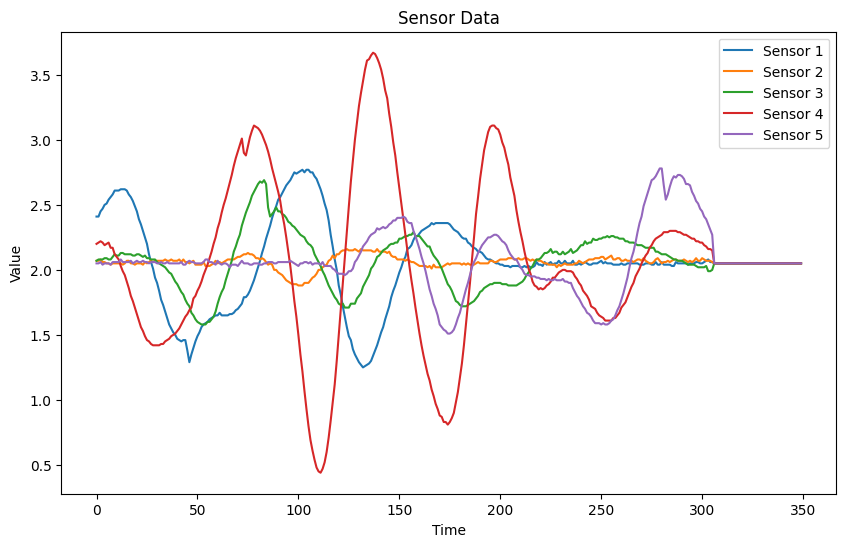

Dự đoán cuối cùng: [31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93]


In [37]:
# Tạo DataLoader từ test_dataset với batch_size=1 và shuffle=True
data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# Lấy một mẫu ngẫu nhiên từ DataLoader
for input_sequence, label in data_loader:
    # In nhãn của mẫu
    print("Nhãn của mẫu:", label.item())

    # Vẽ dữ liệu từng cảm biến
    plt.figure(figsize=(10, 6))
    for i in range(num_sensors):
        plt.plot(input_sequence[0][i].cpu(), label=f"Sensor {i+1}")
    plt.title('Sensor Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Dự đoán đầu ra cho mẫu đã lấy ngẫu nhiên
    with torch.no_grad():
        output = model(input_sequence.to(device))

    # Xử lý đầu ra để có được dự đoán cuối cùng
    predicted_class = torch.argmax(output, dim=1)
    predicted_label = index_to_label_func(predicted_class.item())

    print("Dự đoán cuối cùng:", predicted_label)

    # Dừng sau khi lấy một mẫu
    break
